<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_4__Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Portfolio Optimisation / Efficient Frontier <br>
 BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>

Portfolio Optimisation by Shruti Dash https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#:~:text=Efficient%20frontier%20is%20a%20graph,given%20level%20of%20expected%20return.





##Load BSE Data in CSV format

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.to_datetime('today').strftime('%d %B %Y')

'21 February 2023'

In [2]:
!wget -q -O bharti.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_Bharti-2020-2022.csv
!wget -q -O hulv.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HULV-2020-2022.csv
!wget -q -O lnto.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_LNT-2020-2022.csv
!wget -q -O hdfc.csv https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/BSE_HDFC-2020-2022.csv

In [ ]:
#df = pd.read_csv('bharti.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.sort_values('Date', axis = 0, inplace = True)
#df.set_index('Date',inplace=True)
#df

In [23]:
def BSEdata(fileName, secName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'Open Price','High Price','Low Price','WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open','No. of Trades','Total Turnover (Rs.)','No.of Shares']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Close Price':secName})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

#Efficient Frontier

In [54]:
dfBharti = BSEdata('bharti.csv', 'BHARTI')
dfHULV = BSEdata('hulv.csv','HULV')
dfHDFC = BSEdata('hdfc.csv','HDFC')
dfLNTO = BSEdata('lnto.csv','LNTO')

In [55]:
dfBharti.head()

,BHARTI
Date,
2020-01-01,453.30
2020-01-02,455.00
2020-01-03,455.00
2020-01-06,449.50
2020-01-07,445.35


In [56]:
df2Com = pd.merge(dfHDFC,dfBharti, on='Date')
df3Com = pd.merge(df2Com, dfHULV, on='Date')
df = pd.merge(df3Com, dfLNTO, on='Date')
df.head()

,HDFC,BHARTI,HULV,LNTO
Date,,,,
2020-01-01,1279.05,453.30,1936.75,1310.10
2020-01-02,1286.65,455.00,1938.15,1345.00
2020-01-03,1268.10,455.00,1928.75,1335.15
2020-01-06,1241.15,449.50,1915.55,1316.30
2020-01-07,1260.85,445.35,1920.15,1320.25


In [87]:
df2Com = pd.merge(dfHDFC,dfLNTO, on='Date')
df = pd.merge(df2Com, dfHULV, on='Date')

df.head()

,HDFC,LNTO,HULV
Date,,,
2020-01-01,1279.05,1310.10,1936.75
2020-01-02,1286.65,1345.00,1938.15
2020-01-03,1268.10,1335.15,1928.75
2020-01-06,1241.15,1316.30,1915.55
2020-01-07,1260.85,1320.25,1920.15


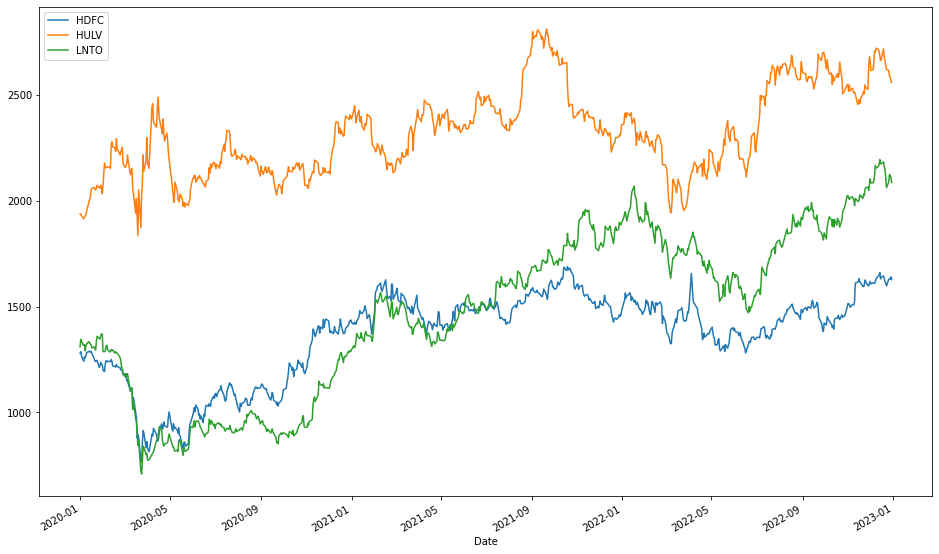

In [88]:
df.plot(y = ['HDFC','HULV','LNTO'],figsize = (16,10))

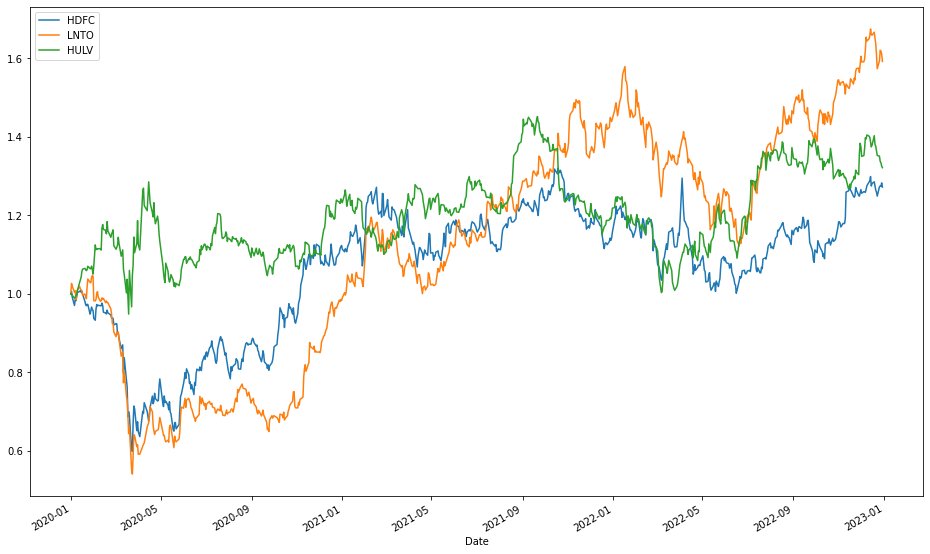

In [89]:
df2 = df.copy()
df2['HDFC'] = df2['HDFC']/df2['HDFC'][0]
df2['HULV'] = df2['HULV']/df2['HULV'][0]
df2['LNTO'] = df2['LNTO']/df2['LNTO'][0]

df2.plot(figsize = (16,10))


In [90]:
# Log of percentage change
cov_matrix =df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,HDFC,LNTO,HULV
HDFC,0.000390,0.000222,0.000100
LNTO,0.000222,0.000396,0.000112
HULV,0.000100,0.000112,0.000284


In [91]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,HDFC,LNTO,HULV
HDFC,1.000000,0.565368,0.299912
LNTO,0.565368,1.000000,0.335578
HULV,0.299912,0.335578,1.000000


In [92]:
w = {'HDFC': 0.1, 'HULV': 0.5, 'LNTO': 0.4}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0002108267662518293

In [93]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

HDFC    0.064820
LNTO    0.286369
HULV    0.035317
dtype: float64

In [94]:
w = [0.1, 0.5, 0.4]
port_er = (w*ind_er).sum()
port_er

0.16379298875655823

In [95]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

HDFC    0.312386
LNTO    0.314553
HULV    0.266234
dtype: float64

In [96]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
HDFC,0.064820,0.312386
LNTO,0.286369,0.314553
HULV,0.035317,0.266234


In [97]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [98]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [99]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [100]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,HDFC weight,LNTO weight,HULV weight
0,0.129417,0.248016,0.491091,0.317112,0.191797
1,0.143358,0.252016,0.467683,0.375392,0.156924
2,0.245093,0.284838,0.087637,0.825288,0.087075
3,0.157053,0.260703,0.472948,0.429325,0.097726
4,0.197248,0.277651,0.392345,0.598902,0.008753


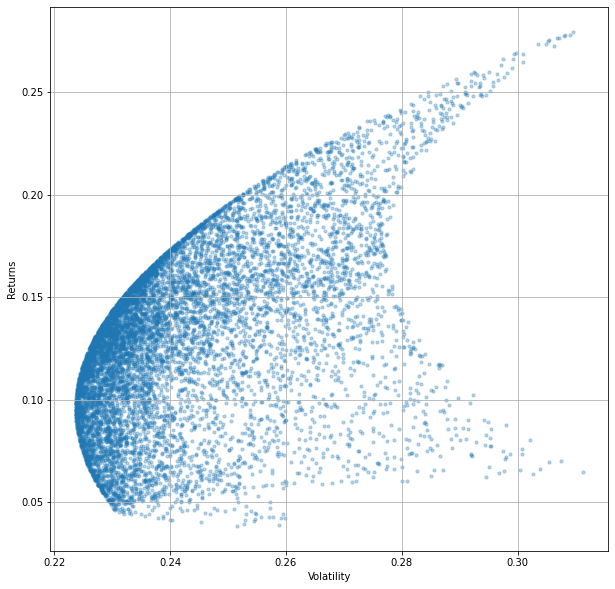

In [101]:
#Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])# Plot

In [102]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.096500
Volatility     0.223758
HDFC weight    0.252523
LNTO weight    0.214031
HULV weight    0.533445
Name: 9400, dtype: float64

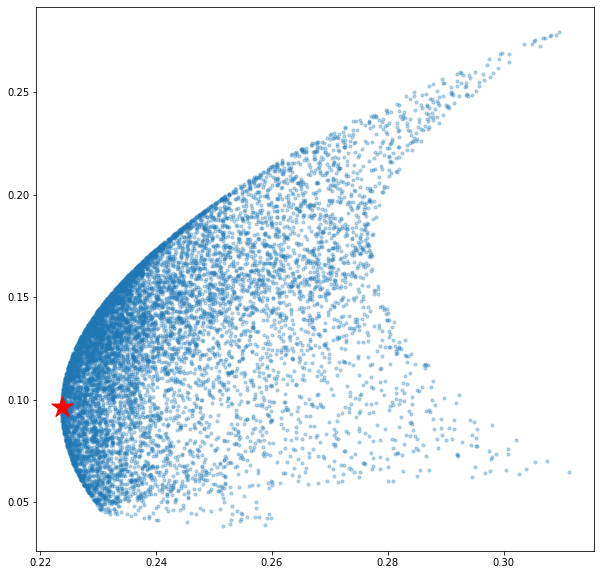

In [103]:
# Plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [114]:
# Findinding the optimal portfolio
rf = 0.005 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.279527
Volatility     0.309497
HDFC weight    0.016930
LNTO weight    0.970759
HULV weight    0.012311
Name: 5051, dtype: float64

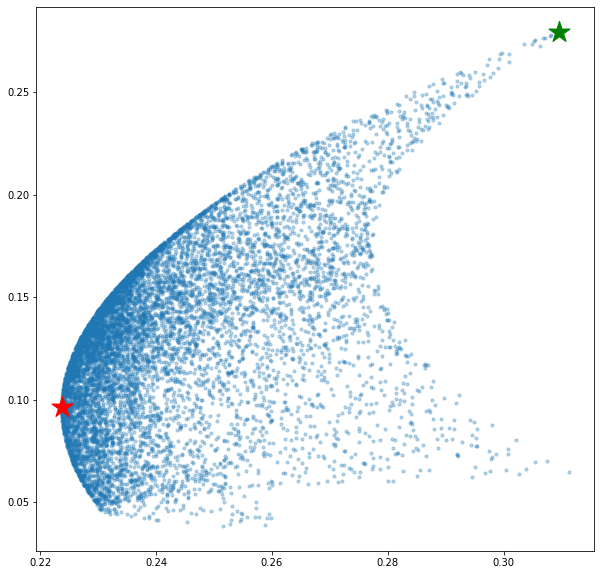

In [115]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)